# Transform Data for Vizualization

## `words.csv` embeddings

*Eventually want this to be an executable. Potentially being run after a pipeline*

In [22]:
# Import dependencies

import pandas as pd
import seaborn as sns

In [7]:
file_path = '../data/embeddings/words.csv'

words_df = pd.read_csv(file_path)

In [8]:
words_df.head()

,Unnamed: 0,words,vectors,cluster,cluster_value,closeness_score,sentiment_coeff,sentiments
0,0,slavaukraini,[ 1.35113846e-03 -4.37716506e-02 5.63693643e-...,2,-1,13.419547,-13.419547,negative
1,1,ukraine,[-0.00833533 -0.0502086 0.05567726 -0.015725...,2,-1,9.034612,-9.034612,negative
2,2,',[ 4.05742263e-04 -4.62536104e-02 6.47858679e-...,2,-1,15.928293,-15.928293,negative
3,3,putin,[-0.00240385 -0.05282527 0.06500029 -0.016937...,2,-1,12.871160,-12.871160,negative
4,4,russia,[ 3.06908507e-03 -4.81047444e-02 6.40448779e-...,2,-1,18.269216,-18.269216,negative


In [19]:
words_df = words_df.drop(columns=['Unnamed: 0', 'vectors', 'cluster'])

In [20]:
words_df.describe()

,cluster_value,closeness_score,sentiment_coeff
count,5996.000000,5996.000000,5996.000000
mean,-0.257672,18.593325,-5.982736
std,0.930880,5.223059,17.989848
min,-1.000000,0.601255,-29.412926
25%,-1.000000,16.237116,-21.529929
50%,-1.000000,19.378920,-15.971034
75%,1.000000,22.415127,16.084731
max,1.000000,29.412926,26.880291


In [21]:
words_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996 entries, 0 to 5995
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   words            5996 non-null   object 
 1   cluster_value    5996 non-null   int64  
 2   closeness_score  5996 non-null   float64
 3   sentiment_coeff  5996 non-null   float64
 4   sentiments       5996 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 234.3+ KB


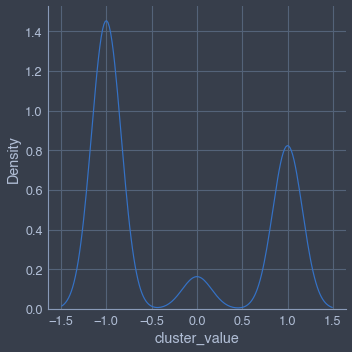

In [23]:
sns.displot(words_df, x="cluster_value", kind="kde")

In [24]:
# Output to visualizations/

words_df.to_csv('../../visualizations/part1/data/words.csv')

## Build a "summary" file

In [27]:
words_summary_df = pd.DataFrame(words_df['sentiments'].value_counts())

In [30]:
words_summary_df

,sentiments
negative,3569
positive,2024
neutral,403


In [34]:
words_summary_df = words_summary_df.reset_index().rename(columns={'index': 'sentiment', 'sentiments': 'count'})
words_summary_df

,sentiment,count
0,negative,3569
1,positive,2024
2,neutral,403


In [41]:
s = sum(words_summary_df['count'])
words_summary_df['percent'] = words_summary_df['count'] / s * 100

In [42]:
# Output to visualizations/

words_summary_df.to_csv('../../visualizations/part1/data/words_summary.csv')

In [35]:
test = [3569, 2024, 403]

total = sum(test)
normal = []
for x in test:
    normal.append((x / total) * 100)

print(normal)
print(sum(normal))

[59.52301534356238, 33.755837224816545, 6.72114743162108]
100.0


In [38]:
sum(test)

5996